In [1]:
##Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
##Importing dataset
dataset=pd.read_csv("Social_Network_Ads.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [4]:
##Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [5]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [6]:
##Assume that we can consider kernel svm as classification model
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)

SVC()

In [7]:
##Creating Confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[63  3]
 [ 4 30]]


0.93

In [8]:
##KFold cross validation  
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
print("Accuracy:{:.2f}%".format(accuracy.mean()*100))
print("Standard Deviation:{:.2f}%".format(accuracy.std()*100))

Accuracy:90.67%
Standard Deviation:3.89%


In [10]:
##Grid search to find 
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[0.25,0.50,0.75,1.0],'kernel':['linear']},
            {'C':[0.25,0.50,0.75,1.0],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
gscv=GridSearchCV(estimator=classifier,param_grid=parameters,scoring="accuracy",cv=10,n_jobs=-1)
gscv.fit(x_train,y_train)
best_accuracy=gscv.best_score_
best_parameters=gscv.best_params_
print("Accuracy:{:.2f}%".format(best_accuracy*100))
print("Best parameters",best_parameters)

Accuracy:91.00%
Best parameters {'C': 0.5, 'gamma': 0.5, 'kernel': 'rbf'}


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


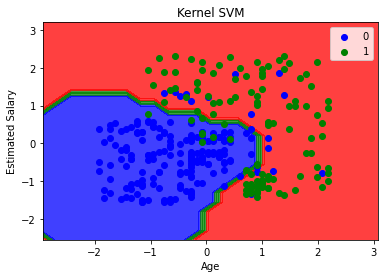

In [12]:
##Visualization the training set
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min() -1,stop=x_set[:,0].max() +1,step=0.25),
                  np.arange(start=x_set[:,1].min() -1,stop=x_set[:,1].max() +1,step=0.25))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(("blue","green","red")))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j, 0],x_set[y_set==j, 1],c=ListedColormap(("blue","green","red"))(i),label=j)
plt.title("Kernel SVM")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


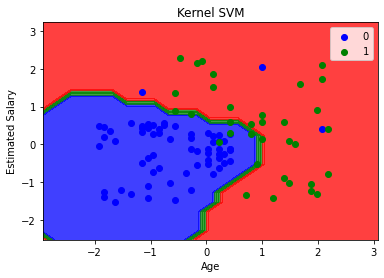

In [14]:
##Visualization the test set
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min() -1,stop=x_set[:,0].max() +1,step=0.25),
                  np.arange(start=x_set[:,1].min() -1,stop=x_set[:,1].max() +1,step=0.25))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(("blue","green","red")))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j, 0],x_set[y_set==j, 1],c=ListedColormap(("blue","green","red"))(i),label=j)
plt.title("Kernel SVM")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()